# Random Forest Classifier with MAGIC Gamma-Ray Telescope Data

In this guide, you will learn how to implement a Random Forest machine learning technique to classify MAGIC Gamma-Ray Telescope simulated events using scikit-learn. 

There are two types of events in MAGIC telescope data, gamma rays (g) and cosmic-ray hadrons (h). Gamma rays are the signal that telescopes like MAGIC search for, while cosmic-ray hadrons are the background with a rate much higher than the gamma rays. The images from signal gamma rays and background hadrons possess different signatures, with gamma-ray events looking slim and clean, while hadronic events look wide and messy. 

The goal is to optimize event classification and achive an ideal gamma-ray detection sensitivity.  

This notebook is adapted from Akhilesh Thite's notebook: https://www.kaggle.com/akhileshthite/magic-gamma-telescope-random-forest-99-98/notebook 

The data are from https://www.kaggle.com/abhinand05/magic-gamma-telescope-dataset, where more information can be found. 


Columns in data file: 

- Index of each data point.

- fLength: major axis of ellipse [mm]

- fWidth: minor axis of ellipse [mm]

- fSize: 10-log of sum of content of all pixels [in #phot]

- fConc: ratio of sum of two highest pixels over fSize [ratio]

- fConc1: ratio of highest pixel over fSize [ratio]

- fAsym: distance from highest pixel to center, projected onto major axis [mm]

- fM3Long: 3rd root of third moment along major axis [mm]

- fM3Trans: 3rd root of third moment along minor axis [mm]

- fAlpha: angle of major axis with vector to origin [deg]

- fDist: distance from origin to center of ellipse [mm]

- class: gamma (signal), hadron (background)



## Steps

In this guide, we will follow the following steps:

* Step 1 - Importing the required libraries and modules.

* Step 2 - Loading the dataset and performing basic data checks.

* Step 3 - Exploring and visualising the dataset 

* Step 4 - Preparing the input feature variables (label encoding, train / test split)

* Step 5 - Training and evaluating a Random Forrest classification model.


## Step 1 - Importing the required libraries and modules.


In [50]:
# not important: disable matplotlib warning for a cleaner look
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# data IO
import pandas as pd

# data exploring / checking
import pandas_profiling as pp


%matplotlib inline
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# standard for vectorized computing
import numpy as np


# scikit-learn for machine learning
import sklearn

# encoding dependent data (output label to 1 and 0)
from sklearn.preprocessing import LabelEncoder

# train/test split
from sklearn.model_selection import train_test_split

# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection

# Model evaluation
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score


## Step 2 - Loading the dataset and performing basic data checks.


In [21]:
# Define path to file (you may need to change this to match your system)
input_file = "telescope_data.csv"

# Load the file using pandas; the first column is just index
df = pd.read_csv(input_file, index_col=0)

# Display the data
df


fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.2610     g  
2      -45.2160  76.9600  256.7880     g  
3       -7.1513  10.4490  116.7370     g  
4       21.8393   4.6480  356.4620     g  
...         ...      ...       ...   ...  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h  

[19020 rows x 11 columns]

In [22]:
# the first 10 columns are the input features; these are image parameters measured by the telescope
X = df.iloc[:, 0:-1].values
# label signal / background class
y = df.iloc[:, -1].values

# Dataset information (Pandas Profiling)

In [24]:
pp.ProfileReport(df, title = 'Pandas Profiling report of MAGIC Kaggle dataset', 
                 html = {'style':{'full_width': True}})

## Step 3 - Exploring and visualising the dataset 


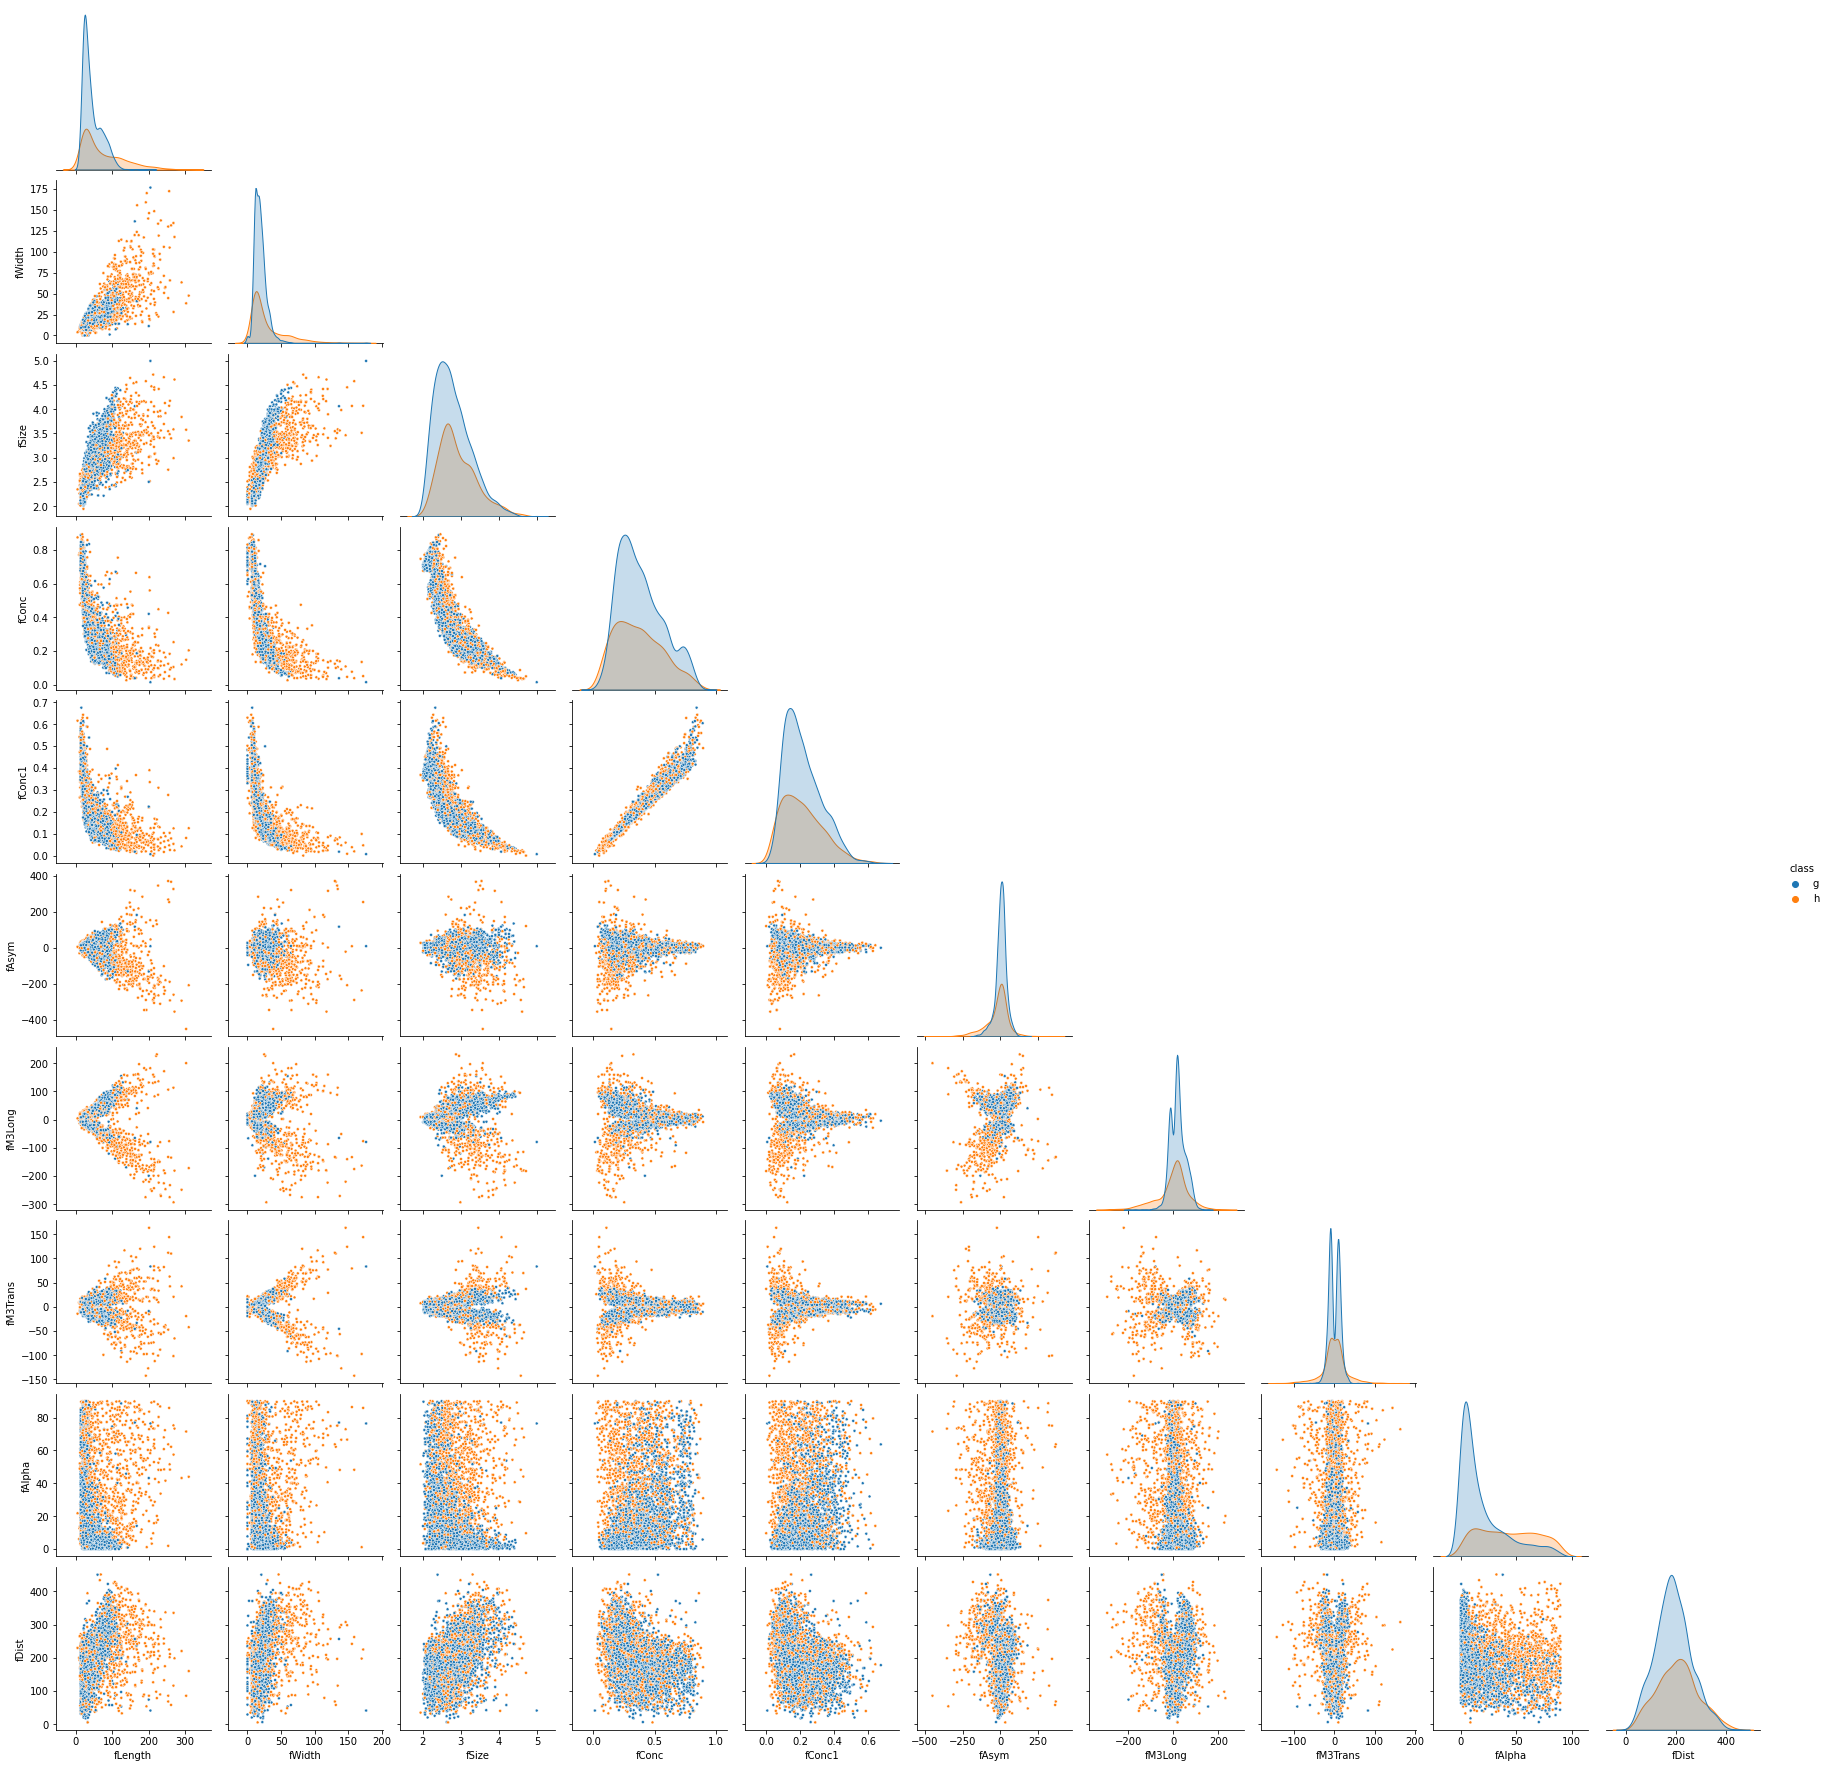

In [39]:
# randomly sample 20% data to view correlations and distributions
sns.pairplot(data=df.sample(frac=0.2), hue='class', corner=True, markers='.') 


## Step 4 - Preparing the input feature variables (label encoding, train / test split)


In [40]:
le = LabelEncoder()
y = le.fit_transform(y)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


## Step 5 - Training and evaluating a Random Forrest classification model.


In [90]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', 
                                    random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

### Predicting a new result

In [86]:
print(classifier.predict( X_train[1:2] ))

[0]


### Check training performance

In [87]:
y_trained = classifier.predict(X_train)
print(classification_report(y_train, y_trained))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      9253
           1       0.93      0.44      0.60      5012

    accuracy                           0.79     14265
   macro avg       0.85      0.71      0.73     14265
weighted avg       0.82      0.79      0.77     14265



### Predicting the Test set results

In [88]:
y_pred = classifier.predict(X_test)

### Check test performance

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      3079
           1       0.93      0.43      0.58      1676

    accuracy                           0.79      4755
   macro avg       0.84      0.70      0.72      4755
weighted avg       0.82      0.79      0.76      4755



### Making the Confusion Matrix for evaluation

In [72]:
print(confusion_matrix(y_train, y_trained))
print("Train accuracy: {:.2f}%".format(accuracy_score(y_train, y_trained)*100))

[[9249    4]
 [  48 4964]]
Train accuracy: 99.64%


In [73]:
print(confusion_matrix(y_test, y_pred))
print("Test accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

[[2923  156]
 [ 435 1241]]
Test accuracy: 87.57%


### Test performance is much worse than training performance: <font color='red'> overtrained </font> 

* max_depth: int, default=None

 The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

* We don't want trees that too deep, as it's easy to overfit; we certainly don't want pure leaves as that would be memorizing data, leading to an extreme overtraining

* Regularize the RF classifier: first try to use shallower trees

In [123]:
def train_rf(show_feature_importance=False, **kwargs): 
    classifier = RandomForestClassifier(**kwargs)
    classifier.fit(X_train, y_train)
    y_trained = classifier.predict(X_train)
    print("================ training performance ================")
    print(classification_report(y_train, y_trained))
    
    y_pred = classifier.predict(X_test)
    print("================ test performance ================")
    print(classification_report(y_test, y_pred))
    
    if show_feature_importance: 
        importances = classifier.feature_importances_
        std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
                     axis=0)
        indices = np.argsort(importances)[::-1]

        # Print the feature ranking
        print("Feature ranking:")

        tick_names = []

        for f in range(X.shape[1]):
            print("%d. feature %d %s (%f)" % (f + 1, indices[f], df.columns[indices[f]], importances[indices[f]]))
            tick_names.append(df.columns[indices[f]])

        # Plot the impurity-based feature importances of the forest
        plt.figure(figsize=(8,5))
        plt.title("Feature importances")
        plt.bar(range(X.shape[1]), importances[indices],
                color="r", yerr=std[indices], align="center")
        plt.xticks(range(X.shape[1]), tick_names)


        plt.xlim([-1, X.shape[1]])
        plt.show()
    return classifier



class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

================ training performance ================
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      9253
           1       0.93      0.44      0.60      5012

    accuracy                           0.79     14265
   macro avg       0.85      0.71      0.73     14265
weighted avg       0.82      0.79      0.77     14265

================ test performance ================
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      3079
           1       0.93      0.43      0.58      1676

    accuracy                           0.79      4755
   macro avg       0.84      0.70      0.72      4755
weighted avg       0.82      0.79      0.76      4755

Feature ranking:
1. feature 8 fAlpha (0.331547)
2. feature 0 fLength (0.208853)
3. feature 1 fWidth (0.169047)
4. feature 6 fM3Long (0.134414)
5. feature 2 fSize (0.052810)
6. feature 5 fAsym (0.040870)
7. feature 7 fM3Trans (0.029478)
8. f

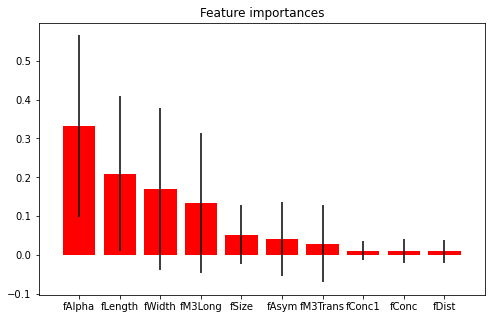

In [126]:
rf_max_depth3 = train_rf(show_feature_importance=True, n_estimators = 100, criterion = 'entropy', 
                         random_state = 0, max_depth=3)

### max_depth seems to have high bias, under trained

In [101]:
rf_max_depth2 = train_rf(n_estimators = 100, criterion = 'entropy', 
                         random_state = 0, max_depth=2)

================ training performance ================
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      9253
           1       0.95      0.31      0.47      5012

    accuracy                           0.75     14265
   macro avg       0.84      0.65      0.65     14265
weighted avg       0.80      0.75      0.71     14265

================ test performance ================
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      3079
           1       0.94      0.32      0.47      1676

    accuracy                           0.75      4755
   macro avg       0.83      0.65      0.66      4755
weighted avg       0.80      0.75      0.71      4755



### Regularize the RF classifier: try to allow impure leaves

In [102]:
rf_max_min_samples_split0p1 = train_rf(n_estimators = 100, criterion = 'entropy', 
                         random_state = 0, min_samples_split=0.1)

================ training performance ================
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      9253
           1       0.86      0.64      0.73      5012

    accuracy                           0.84     14265
   macro avg       0.85      0.79      0.81     14265
weighted avg       0.84      0.84      0.83     14265

================ test performance ================
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      3079
           1       0.87      0.64      0.73      1676

    accuracy                           0.84      4755
   macro avg       0.85      0.79      0.81      4755
weighted avg       0.84      0.84      0.83      4755



In [106]:
rf_max_min_samples_split0p1 = train_rf(n_estimators = 100, criterion = 'entropy', 
                         random_state = 0, min_samples_split=0.2, max_depth=4)

================ training performance ================
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      9253
           1       0.89      0.52      0.66      5012

    accuracy                           0.81     14265
   macro avg       0.84      0.74      0.76     14265
weighted avg       0.83      0.81      0.79     14265

================ test performance ================
              precision    recall  f1-score   support

           0       0.78      0.97      0.87      3079
           1       0.91      0.50      0.65      1676

    accuracy                           0.81      4755
   macro avg       0.84      0.74      0.76      4755
weighted avg       0.83      0.81      0.79      4755



In [114]:
rf_max_min_samples_split0p1 = train_rf(n_estimators = 100, criterion = 'entropy', 
                         random_state = 0, min_samples_split=4,  min_samples_leaf=3)

================ training performance ================
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9253
           1       0.99      0.94      0.96      5012

    accuracy                           0.98     14265
   macro avg       0.98      0.97      0.97     14265
weighted avg       0.98      0.98      0.97     14265

================ test performance ================
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3079
           1       0.89      0.75      0.82      1676

    accuracy                           0.88      4755
   macro avg       0.88      0.85      0.87      4755
weighted avg       0.88      0.88      0.88      4755



================ training performance ================
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      9253
           1       0.91      0.59      0.72      5012

    accuracy                           0.84     14265
   macro avg       0.86      0.78      0.80     14265
weighted avg       0.85      0.84      0.83     14265

================ test performance ================
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      3079
           1       0.91      0.59      0.71      1676

    accuracy                           0.83      4755
   macro avg       0.86      0.78      0.80      4755
weighted avg       0.85      0.83      0.82      4755

Feature ranking:
1. feature 8 fAlpha (0.366136)
2. feature 0 fLength (0.197198)
3. feature 1 fWidth (0.137180)
4. feature 6 fM3Long (0.111822)
5. feature 2 fSize (0.086159)
6. feature 5 fAsym (0.028475)
7. feature 7 fM3Trans (0.018990)
8. f

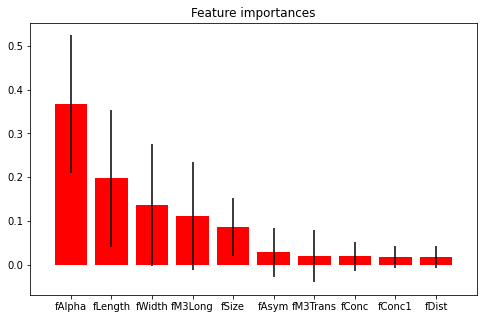

In [146]:
rf_max_min_samples_split0p1 = train_rf(show_feature_importance=True, n_estimators = 100, criterion = 'entropy', 
                         random_state = 0, min_samples_leaf=4, max_depth=5,ccp_alpha=1e-3, 
                                       min_samples_split=10, min_impurity_decrease=3e-3)

In [148]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3,6,9],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_max_min_samples_split0p1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_



Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  2.0min finished


{'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 300}

================ training performance ================
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      9253
           1       0.93      0.74      0.82      5012

    accuracy                           0.89     14265
   macro avg       0.90      0.85      0.87     14265
weighted avg       0.89      0.89      0.89     14265

================ test performance ================
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3079
           1       0.91      0.71      0.79      1676

    accuracy                           0.87      4755
   macro avg       0.88      0.83      0.85      4755
weighted avg       0.87      0.87      0.87      4755

Feature ranking:
1. feature 8 fAlpha (0.321085)
2. feature 0 fLength (0.171399)
3. feature 1 fWidth (0.140861)
4. feature 2 fSize (0.106755)
5. feature 6 fM3Long (0.084850)
6. feature 9 fDist (0.043481)
7. feature 3 fConc (0.038978)
8. feat

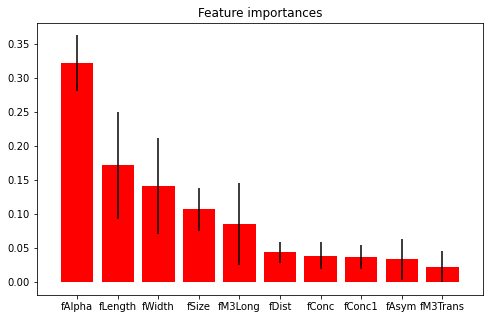

In [151]:
rf_max_min_samples_split0p1 = train_rf(show_feature_importance=True, n_estimators = 300, criterion = 'entropy', 
                         random_state = 0, min_samples_leaf=3, max_depth=9,
                                       min_samples_split=12, )

### Visualising predictions

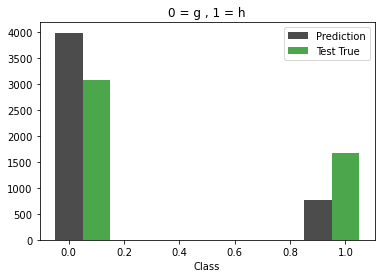

In [162]:
plt.hist(y_pred, label="Prediction", align="left", color='k', alpha=0.7)
plt.hist(y_test,  label="Test True", align="right", color='g', alpha=0.7)

plt.title('0 = g , 1 = h')
plt.xlabel('Class')
plt.legend()

plt.show()

### Visualising real values

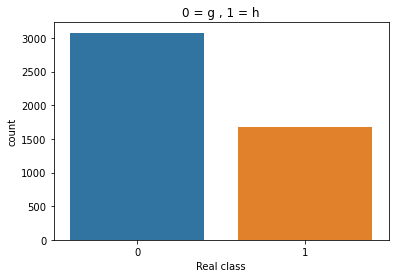

In [54]:
sns.countplot(y_test,  data=dataset)
plt.title('0 = g , 1 = h')
plt.xlabel('Real class')
plt.show()

### 

In [76]:
df.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

Feature ranking:
1. feature 8 fAlpha (0.213972)
2. feature 0 fLength (0.139309)
3. feature 1 fWidth (0.115142)
4. feature 6 fM3Long (0.109724)
5. feature 2 fSize (0.108817)
6. feature 9 fDist (0.072935)
7. feature 3 fConc (0.065362)
8. feature 4 fConc1 (0.062118)
9. feature 5 fAsym (0.057386)
10. feature 7 fM3Trans (0.055235)


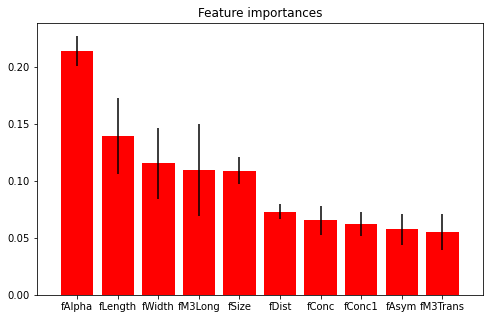

In [79]:
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

tick_names = []

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], df.columns[indices[f]], importances[indices[f]]))
    tick_names.append(df.columns[indices[f]])

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(8,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), tick_names)


plt.xlim([-1, X.shape[1]])
plt.show()